<a href="https://colab.research.google.com/github/prokope/my_notebook/blob/main/crime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
uploaded = files.upload()


Saving DOMensalEstadoDesde1991.csv to DOMensalEstadoDesde1991 (4).csv


In [118]:
import pandas as pd
dados_de_crimes = pd.read_csv("DOMensalEstadoDesde1991.csv", sep=";")
dados_de_crimes.columns.values[2] = "Homicídios Dolosos"
homicidios_por_ano = dados_de_crimes.groupby('ano', as_index=False)["Homicídios Dolosos"].sum()
homicidios_por_ano = homicidios_por_ano.set_index('ano')
homicidios_por_ano.loc[2023, 'Homicídios Dolosos'] = 3293
nova_linha = pd.DataFrame({'Homicídios Dolosos': [2930]}, index=[2024])
homicidios_por_ano = pd.concat([homicidios_por_ano, nova_linha])

# homicidios_por_ano

In [119]:
!pip install seaborn
import seaborn as sns

In [ ]:
plt.figure(figsize=(13, 6))
sns.lineplot(homicidios_por_ano)
plt.xticks(np.arange(homicidios_por_ano.index.min(), homicidios_por_ano.index.max() + 1, 1))
plt.xticks(rotation=45)
plt.yticks(np.arange(0, homicidios_por_ano['Homicídios Dolosos'].max() + 1000, 1000))
homicidios_por_ano

<Axes: xlabel='None', ylabel='Roubos de celular'>

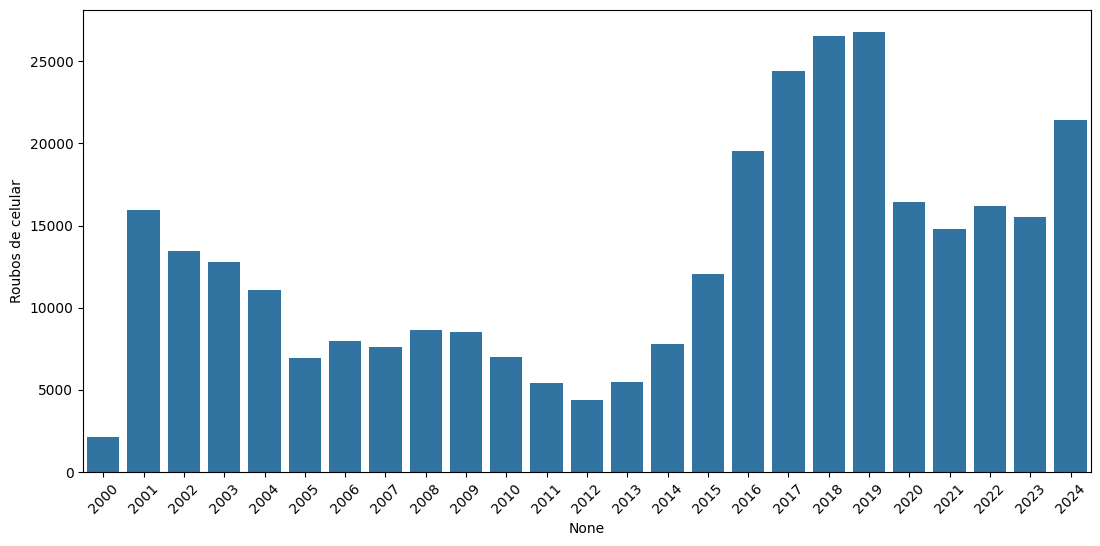

In [141]:
plt.figure(figsize=(13, 6))
plt.xticks(rotation=45)
dados_roubo_celular = dados_de_crimes.groupby('ano')['roubo_celular'].sum()
dados_roubo_celular.loc[2023] = 15496
nova_linha = pd.DataFrame({'roubo_celular': 21423}, index=[2024])
dados_roubo_celular = pd.concat([dados_roubo_celular, nova_linha])
dados_roubo_celular = dados_roubo_celular.drop(index=(range(1991, 2000)))
dados_roubo_celular = dados_roubo_celular.rename(columns={'roubo_celular': "Roubos de celular"})
dados_roubo_celular
sns.barplot(x=dados_roubo_celular.index, y=dados_roubo_celular["Roubos de celular"])